In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

df=pd.read_csv(r'/Users/boom/Desktop/Python project/movies.csv')


In [5]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


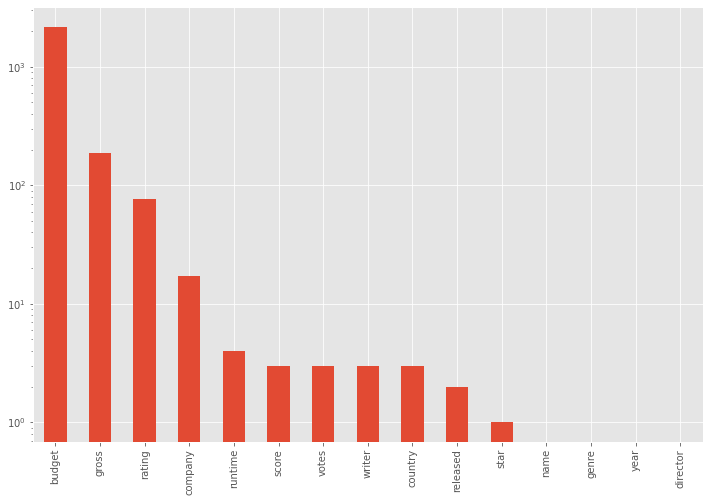

In [6]:
dfOrdered=(df.isna().sum()).sort_values(ascending=False)
graph=dfOrdered.plot(kind='bar')
graph.set_yscale('log')

In [7]:
for col in df.columns:
    pct_missing=np.mean(df[col].isnull())
    print(col,pct_missing)

name 0.0
rating 0.010041731872717789
genre 0.0
year 0.0
released 0.0002608242044861763
score 0.0003912363067292645
votes 0.0003912363067292645
director 0.0
writer 0.0003912363067292645
star 0.00013041210224308815
country 0.0003912363067292645
budget 0.2831246739697444
gross 0.02464788732394366
company 0.002217005738132499
runtime 0.0005216484089723526


In [8]:
#df.dtypes
#df['budget']=df['budget'].astype('int64')
#df[df['budget'].isna()&df['budget'].isna()]
#df.fillna(0)
df['budget']=df['budget'].fillna(0)
df[df['budget'].isna()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime


In [9]:
# Repleace NaN with 0
df['gross']=df['gross'].fillna(0)
df[df['gross'].isna()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime


In [10]:
# Convert float to int
df['budget']=df['budget'].astype('int64')
df['gross']=df['gross'].astype('int64')


In [11]:
# Get year from released
df[['month','date']] = df['released'].str.split('(',expand=True)
df['correctedYear']= df['month'].str[-5:]
df.drop(['month','date'], axis=1, inplace=True)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctedYear
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [12]:
df['company'].drop_duplicates().sort_values(ascending=False)

7129                                thefyzz
5664                            micro_scope
6412               iDeal Partners Film Fund
4007                               i5 Films
6793                             i am OTHER
                       ...                 
3748                     1+2 Seisaku Iinkai
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
408                                     NaN
Name: company, Length: 2386, dtype: object

In [13]:
pd.set_option('display.max_rows',None)

In [14]:
# Budget high correlation
# Company high correlation

Text(0, 0.5, 'Gross Earnings')

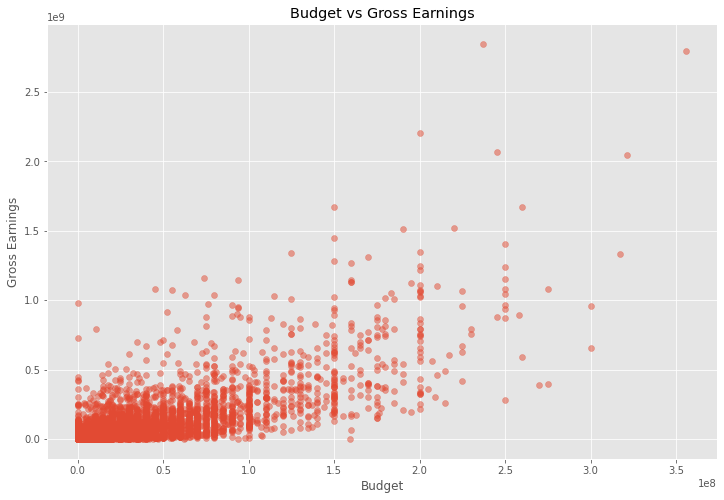

In [15]:
# Scatter plot budget vs gross
plt.scatter(x=df['budget'],y=df['gross'],alpha=0.5)
plt.title("Budget vs Gross Earnings")
plt.xlabel("Budget")
plt.ylabel("Gross Earnings")

<AxesSubplot:xlabel='budget', ylabel='gross'>

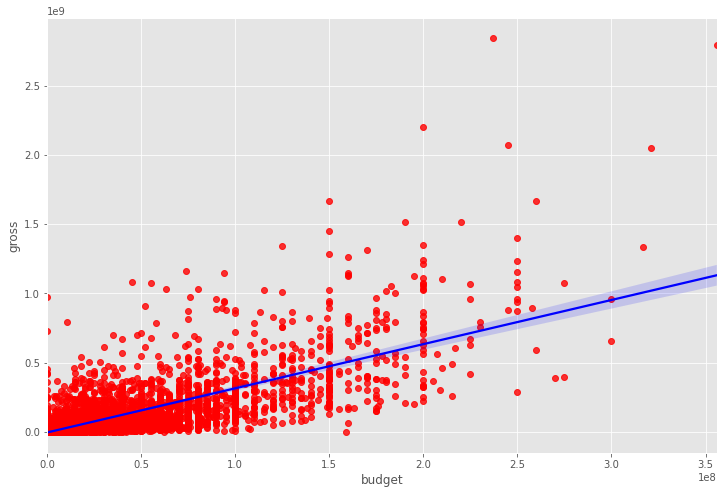

In [16]:
# Plot budget vs gross using seaborn
sns.regplot(x=df['budget'],y=df['gross'], scatter_kws={"color":"red"},line_kws={"color":"blue"})

In [17]:
# Looking at correlation (it will work only on numerical field)
df.corr(method='pearson') #pearson, kendall, spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.309212,0.261900,0.120811
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.399451
votes,0.222945,0.409182,1.000000,0.486862,0.632834,0.309212
budget,0.309212,0.055665,0.486862,1.000000,0.750157,0.269510
gross,0.261900,0.186392,0.632834,0.750157,1.000000,0.245235
runtime,0.120811,0.399451,0.309212,0.269510,0.245235,1.000000


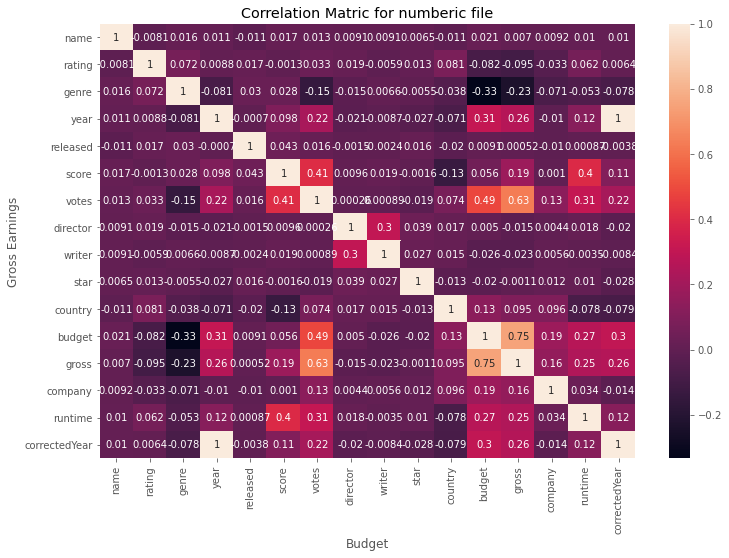

In [39]:
# plot the heat map of correlation
correlation_matrix=df.corr(method='pearson')
sns.heatmap(correlation_matrix,annot=True)
plt.title("Correlation Matric for numberic file")
plt.xlabel("Budget")
plt.ylabel("Gross Earnings")
plt.show()

In [40]:
# Convert columnsinto the category (number representative)
df_nor=df
for colname in df_nor.columns:
    if df_nor[colname].dtype == 'object':
        df_nor[colname]= df_nor[colname].astype('category')
        df_nor[colname]=df_nor[colname].cat.codes

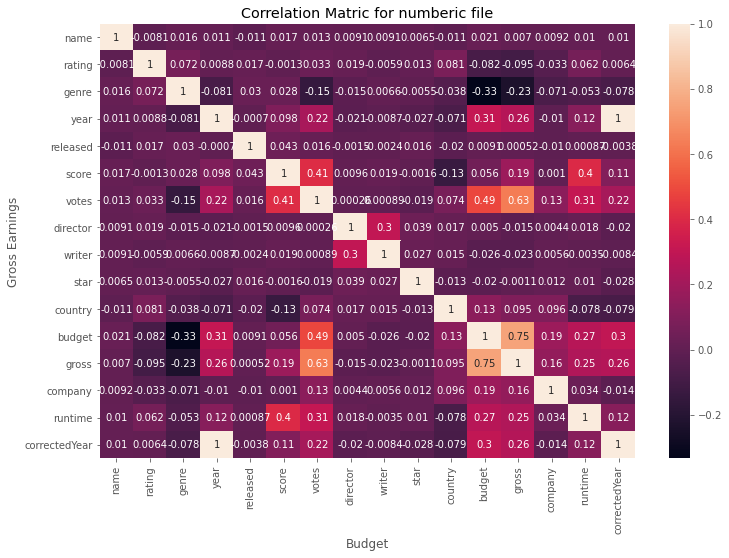

In [22]:
correlation_matrix=df_nor.corr(method='pearson')
sns.heatmap(correlation_matrix,annot=True)
plt.title("Correlation Matric for numberic file")
plt.xlabel("Budget")
plt.ylabel("Gross Earnings")
plt.show()

In [23]:
df_nor.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctedYear
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.020548,0.006989,0.009211,0.010392,0.010225
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.081939,-0.095450,-0.032943,0.062145,0.006403
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.334021,-0.234297,-0.071067,-0.052711,-0.078210
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.097995,0.222945,-0.020795,-0.008656,-0.027242,-0.070938,0.309212,0.261900,-0.010431,0.120811,0.996397
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.042788,0.016097,-0.001478,-0.002404,0.015777,-0.020427,0.009145,0.000519,-0.010474,0.000868,-0.003775
score,0.017097,-0.001314,0.027965,0.097995,0.042788,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.055665,0.186392,0.001030,0.399451,0.106295
votes,0.013088,0.033225,-0.145307,0.222945,0.016097,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.486862,0.632834,0.133204,0.309212,0.218289
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,0.004976,-0.014916,0.004404,0.017624,-0.020385
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.025911,-0.022997,0.005646,-0.003511,-0.008391
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.019952,-0.001129,0.012442,0.010174,-0.027606


In [41]:
cor_mat=df_nor.corr()
cor_pairs=cor_mat.unstack()

In [31]:
sorted_pair=cor_pairs.sort_values()
sorted_pair

budget         genre           -0.334021
genre          budget          -0.334021
               gross           -0.234297
gross          genre           -0.234297
votes          genre           -0.145307
genre          votes           -0.145307
score          country         -0.133348
country        score           -0.133348
rating         gross           -0.095450
gross          rating          -0.095450
budget         rating          -0.081939
rating         budget          -0.081939
genre          year            -0.081261
year           genre           -0.081261
country        correctedYear   -0.079009
correctedYear  country         -0.079009
runtime        country         -0.078412
country        runtime         -0.078412
correctedYear  genre           -0.078210
genre          correctedYear   -0.078210
               company         -0.071067
company        genre           -0.071067
year           country         -0.070938
country        year            -0.070938
runtime        g

In [38]:
high_cor = sorted_pair[(sorted_pair>0.6)&(sorted_pair<0.99)]
high_cor

gross   votes     0.632834
votes   gross     0.632834
gross   budget    0.750157
budget  gross     0.750157
dtype: float64

In [ ]:
# budget and gross has the highest correlation followed by votes and gross correlation